In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_blobs
import seaborn as sns

In [50]:
x, y = make_blobs(n_samples=200, centers=[(-2, -2), (2, 2)], cluster_std=1.0, random_state=42)
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

In [51]:
class net(nn.Module):
    def __init__(self, hidden_act='sigmoid', output_act='sigmoid'):
        super().__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

        if hidden_act == 'sigmoid':
            self.hidden_act = nn.Sigmoid()
        elif hidden_act == 'tanh':
            self.hidden_act = nn.Tanh()
        elif hidden_act == 'relu':
            self.hidden_act = nn.ReLU()        
        else:
            raise ValueError("Unsupported hidden activation function")

        #output
        if output_act == 'sigmoid':
            self.output_act = nn.Sigmoid()    
        elif output_act == 'linear':
            self.output_act = nn.Identity()
        else:
            raise ValueError("Unsupported output activation function")

    def forward(self, x):
        x = self.hidden_act(self.fc1(x))
        x = self.output_act(self.fc2(x))
        return x        

In [52]:
#training loop
def train_model(model, loss_fn, x, y, lr=0.1, epochs=200):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    history= {'loss': [], 'accuracy': []}   

    for epoch in range(epochs):
        yhat = model(x)
        loss = loss_fn(yhat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            pred = (yhat >= 0.5).float()
            accuracy = (pred == y).float().mean().item()
        history['loss'].append(loss.item())
        history['accuracy'].append(accuracy)

    return history        

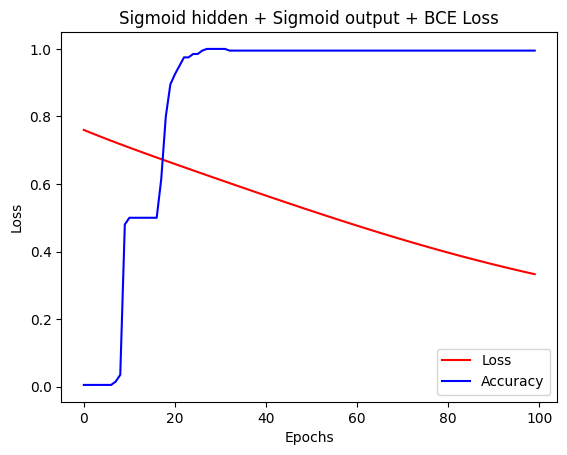

In [53]:
#sigmoid hidden+ output and BCE loss
model1 = net(hidden_act='sigmoid', output_act='sigmoid')
history1 = train_model(model1, nn.BCELoss(), x, y, lr=0.1, epochs=100)
plt.subplots()
sns.lineplot(data=history1['loss'], label='Loss', color='red')
sns.lineplot(data=history1['accuracy'], label='Accuracy', color='blue')
plt.title('Sigmoid hidden + Sigmoid output + BCE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


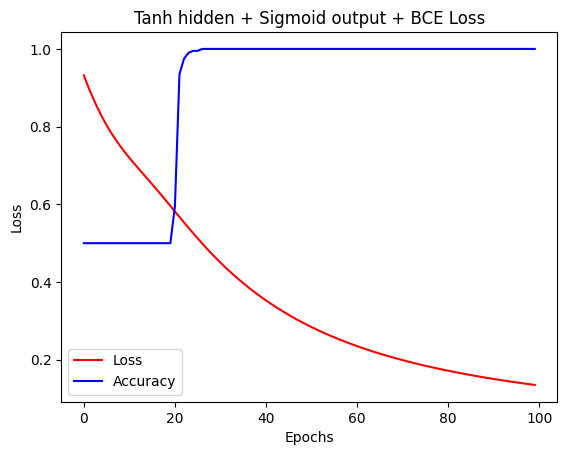

In [54]:
#tanh hidden+ sigmoid output and BCE loss
model2 = net(hidden_act='tanh', output_act='sigmoid')
history2 = train_model(model2, nn.BCELoss(), x, y, lr=0.1, epochs=100)
plt.subplots()
sns.lineplot(data=history2['loss'], label='Loss', color='red')
sns.lineplot(data=history2['accuracy'], label='Accuracy', color='blue')
plt.title('Tanh hidden + Sigmoid output + BCE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

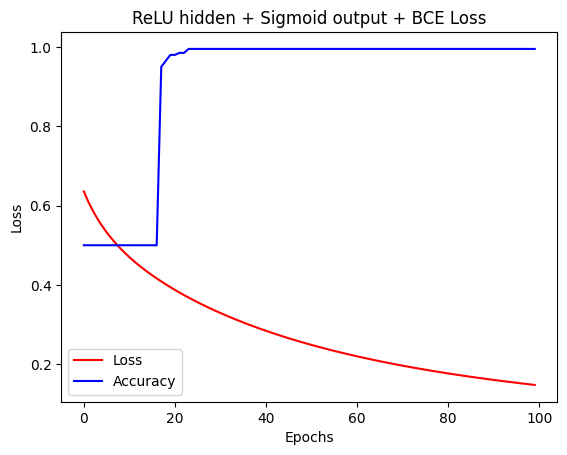

In [55]:
#relu hidden+ sigmoid output and BCE loss
model3 = net(hidden_act='relu', output_act='sigmoid')
history3 = train_model(model3, nn.BCELoss(), x, y, lr=0.1, epochs=100)
plt.subplots()
sns.lineplot(data=history3['loss'], label='Loss', color='red')
sns.lineplot(data=history3['accuracy'], label='Accuracy', color='blue')
plt.title('ReLU hidden + Sigmoid output + BCE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

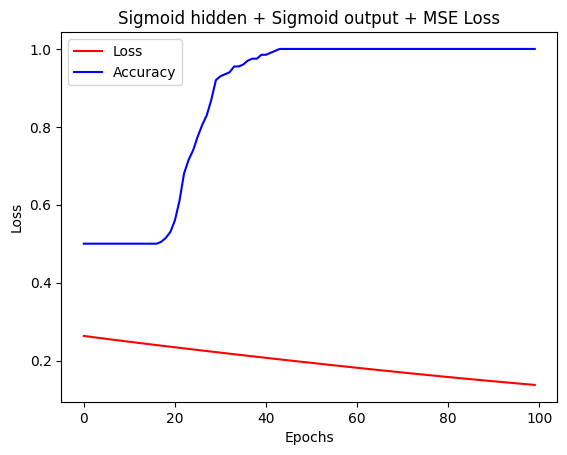

In [56]:
#sigmoid hidden+ output and MSE loss
model4 = net(hidden_act='sigmoid', output_act='sigmoid')
history4 = train_model(model4, nn.MSELoss(), x, y, lr=0.1, epochs=100)
plt.subplots()
sns.lineplot(data=history4['loss'], label='Loss', color='red')
sns.lineplot(data=history4['accuracy'], label='Accuracy', color='blue')
plt.title('Sigmoid hidden + Sigmoid output + MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


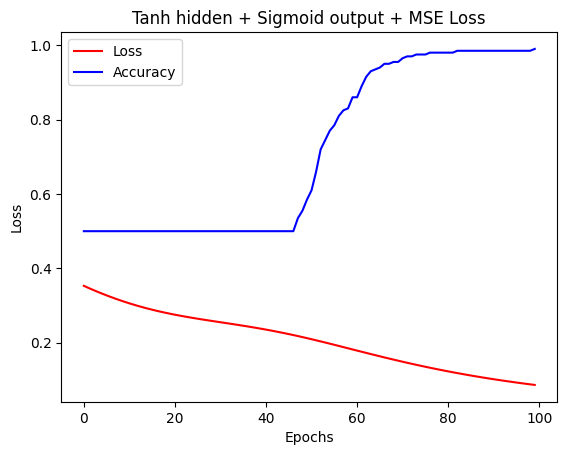

In [57]:
#Tanh hidden+ Sigmoid output and MSE loss
model5 = net(hidden_act='tanh', output_act='sigmoid')
history5 = train_model(model5, nn.MSELoss(), x, y, lr=0.1, epochs=100)
plt.subplots()
sns.lineplot(data=history5['loss'], label='Loss', color='red')
sns.lineplot(data=history5['accuracy'], label='Accuracy', color='blue')
plt.title('Tanh hidden + Sigmoid output + MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


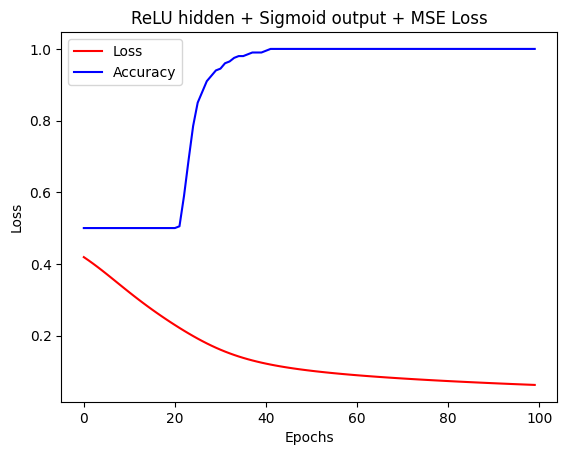

In [58]:
#ReLU hidden+ sigmoid output and MSE loss
model6 = net(hidden_act='relu', output_act='sigmoid')
history6 = train_model(model6, nn.MSELoss(), x, y, lr=0.1, epochs=100)
plt.subplots()
sns.lineplot(data=history6['loss'], label='Loss', color='red')
sns.lineplot(data=history6['accuracy'], label='Accuracy', color='blue')
plt.title('ReLU hidden + Sigmoid output + MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
